
SVM Lineal
Accuracy: 0.8633
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       156
           1       0.85      0.88      0.86       144

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300


SVM Polinomial
Accuracy: 0.8633
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       156
           1       0.82      0.92      0.87       144

    accuracy                           0.86       300
   macro avg       0.87      0.87      0.86       300
weighted avg       0.87      0.86      0.86       300


SVM RBF
Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       156
           1       0.95      0.94      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0

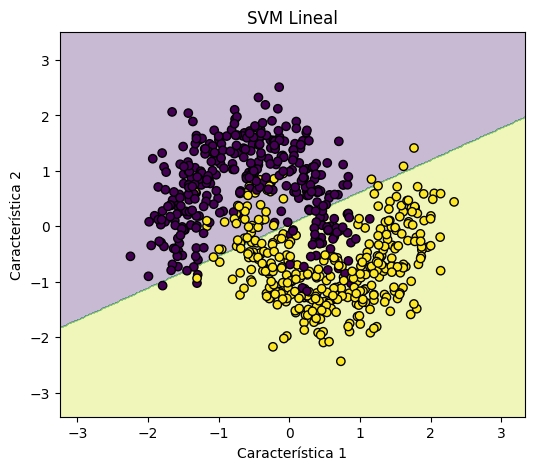

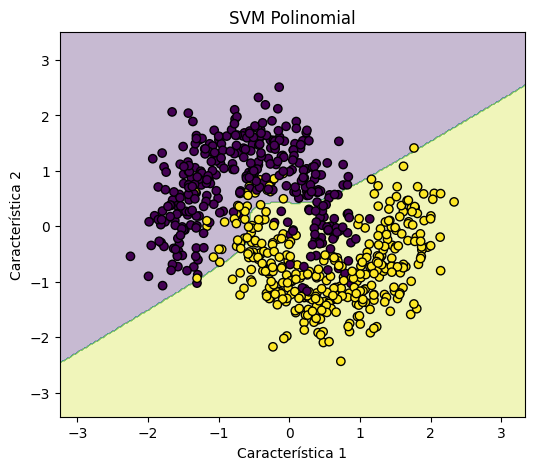

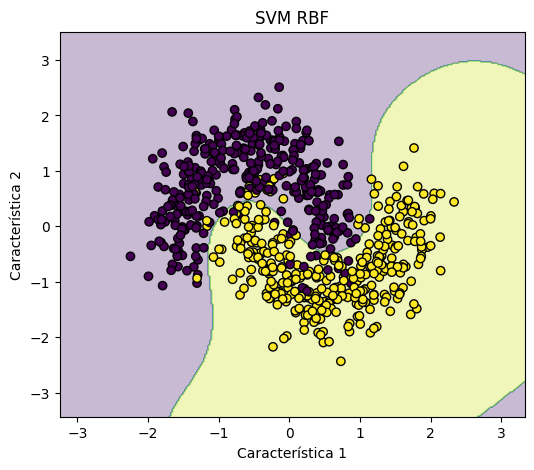

SVM RBF - C bajo
Accuracy: 0.9166666666666666

SVM RBF - C alto
Accuracy: 0.9533333333333334


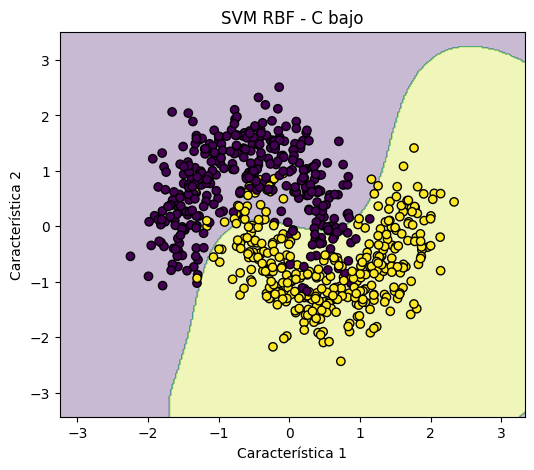

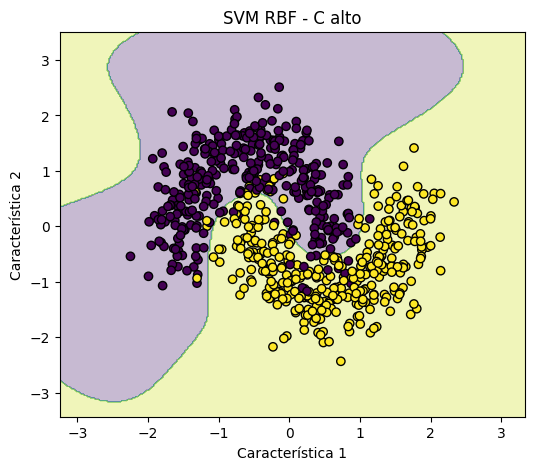

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generación del dataset
X, y = make_moons(
    n_samples=1000,
    noise=0.25,
    random_state=42
)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVM Lineal": SVC(kernel="linear", C=1),
    "SVM Polinomial": SVC(kernel="poly", degree=3, C=1),
    "SVM RBF": SVC(kernel="rbf", gamma="scale", C=1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_train, y_train, name)

svm_C_low = SVC(kernel="rbf", C=0.1, gamma="scale")
svm_C_high = SVC(kernel="rbf", C=100, gamma="scale")

svm_C_low.fit(X_train, y_train)
svm_C_high.fit(X_train, y_train)

print("SVM RBF - C bajo")
print("Accuracy:", accuracy_score(y_test, svm_C_low.predict(X_test)))

print("\nSVM RBF - C alto")
print("Accuracy:", accuracy_score(y_test, svm_C_high.predict(X_test)))


plot_decision_boundary(svm_C_low, X_train, y_train, "SVM RBF - C bajo")
plot_decision_boundary(svm_C_high, X_train, y_train, "SVM RBF - C alto")
